# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Nisvhya Ningsih
- Email:nnisvhya@gmail.com
- Id Dicoding:-

## Menentukan Pertanyaan Bisnis

- Dari tahun 2011-2012, pada musim apa sepeda paling banyak dan paling sedikit disewa?
- Bagaimana perkembangan sewa sepeda dari tahun 2011-2012? Apakah mengalami kenaikan atau penurunan ?

## Menyaipkan semua library yang dibuthkan

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="dark")

## Data Wrangling

### Gathering Data

Dalam analisis ini hanya menggunakan satu tabel saja (day.csv) karena tabel tersebut sudah cukup untuk menjawab kedua pertanyaan diatas.

In [64]:
bike_day_df = pd.read_csv("data/day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Data telah berhasil dimasukan kedalam bentuk dataframe, selanjutnya akan dilakukan penilaian data untuk memeriksa tipe data dan kelengkapan datanya.

**Menilai Data bike_day_df**

In [65]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [66]:
bike_day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari info tabel tersebut tidak terdapat missing value tetapi terdapat kesalahan tipe data pada dteday dimana harus diubah menjadi tipe data datetime.

**Memeriksa duplikasi data bike_day_df**

In [67]:
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil : Tidak terdapat duplikasi data.

**Memeriksa Inaccurate Values Data bike_day_df**

In [68]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat dilihat bahwa tidak ada inaccurate value tetapi penamaan dalam kolom harus di rename agar mudah dibaca dan dipahami.

### Cleaning Data

Mengubah nama kolom agar mudah dipahami

In [69]:
bike_day_df.rename(columns={
    'instant': 'rec_id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

bike_day_df.head()

,rec_id,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Konversi tipe data date dari object menjadi datetime

In [70]:
bike_day_df['date'] = pd.to_datetime(bike_day_df.date)

bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [71]:
bike_day_df.to_csv("dashboard/bike_day_df.csv", index=False)

## Exploratory Data Analysis (EDA)

### **Eksplorasi Jumlah Sewa Berdasarkan Musim**

Pada tahap eksplorasi ini akan dicari jumlah keseluruhan pengguna yang menyewa sepeda di setiap musimnya serta diurutkan dari yang tertinggi hingga terendah.

In [72]:
bike_day_df.groupby('season').agg({
    'count': 'sum'
}).sort_values(by='count', ascending=False)

,count
season,
3,1061129
2,918589
4,841613
1,471348


Dari output diatas dapat dilihat bahwa pada musim:
*   **Fall**(3) terdapat **1,061,129** yang disewa
*   **Summer**(2) terdapat **918,589** yang disewa

*   **Winter**(4) terdapat **841,613** yang disewa
*   **Spring**(1) terdapat **471,348** yang disewa








### **Eksplorasi Jumlah Sewa dari tahun 2011-2012**

In [73]:
bike_day_df['year'] = bike_day_df['year'].apply(lambda x: 2011 if x == 0 else 2012)
bike_day_df.groupby(by='year').agg({
    'count': 'sum'
})

,count
year,
2011,1243103
2012,2049576


## Visualization & Explanatory Analysis

### Dari tahun 2011-2012, pada musim apa sepeda paling banyak dan paling sedikit disewa?

C:\Users\hp\AppData\Local\Temp\ipykernel_26252\2836984681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


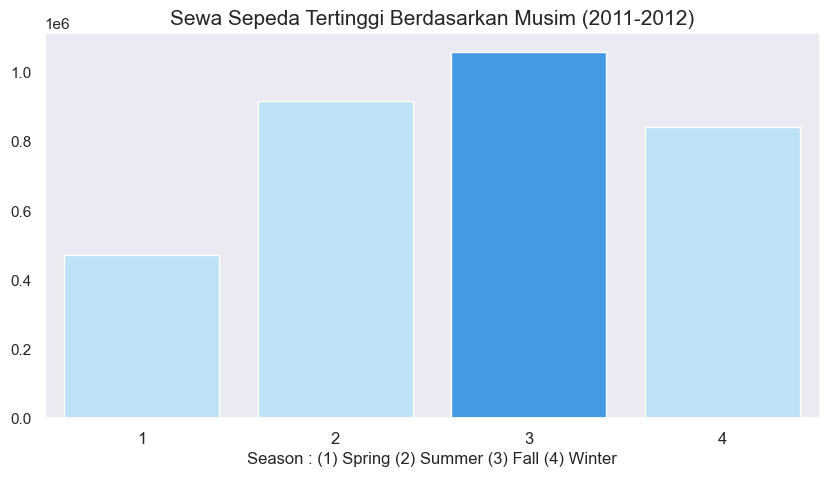

In [74]:
season_df = bike_day_df.groupby(by='season', as_index=False).agg({
    'count': 'sum'
})

plt.figure(figsize=(10, 5))
color_ = ["#B4E4FF", "#B4E4FF", "#279EFF", "#B4E4FF"]

sns.barplot(
    y='count',
    x='season',
    data=season_df,
    palette=color_
)

plt.title("Sewa Sepeda Tertinggi Berdasarkan Musim (2011-2012)", loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel("Season : (1) Spring (2) Summer (3) Fall (4) Winter")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan hasil visualisasi diatas dapat dilihat bahwa penyewaan sepeda paling banyak/tertinggi terjadi pada musim **Fall**.

C:\Users\hp\AppData\Local\Temp\ipykernel_26252\2633963795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


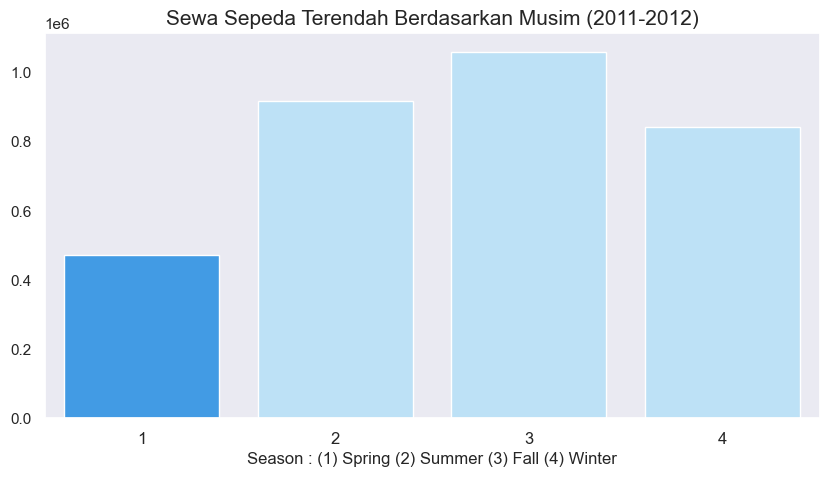

In [85]:
season_df = bike_day_df.groupby(by='season', as_index=False).agg({
    'count': 'sum'
})

plt.figure(figsize=(10, 5))
color_ = ["#279EFF", "#B4E4FF", "#B4E4FF", "#B4E4FF"]

sns.barplot(
    y='count',
    x='season',
    palette=color_,
    data=season_df,
    
)

plt.title("Sewa Sepeda Terendah Berdasarkan Musim (2011-2012)", loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel("Season : (1) Spring (2) Summer (3) Fall (4) Winter")
plt.tick_params(axis='x', labelsize=12)

Berdasarkan hasil visualisasi diatas dapat dilihat bahwa penyewaan sepeda paling sedikit/terendah terjadi pada musim **Spring**.

### Bagaimana perkembangan sewa sepeda dari tahun 2011-2012? Apakah mengalami kenaikan atau penurunan ?

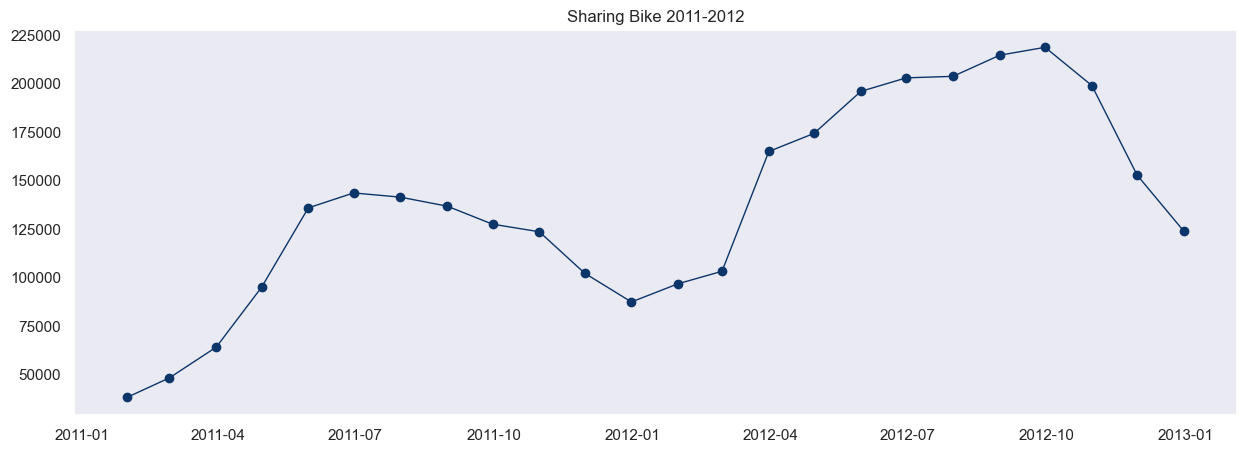

In [76]:
monthly_df = bike_day_df.resample(rule='M', on='date').agg({
    'date': 'max',
    'count': 'sum'
})

plt.figure(figsize=(15, 5))
plt.plot(monthly_df['date'],
         monthly_df['count'],
         linewidth=1,
         marker='o',
         color="#0C356A"
         )

plt.title("Sharing Bike 2011-2012")
plt.show()

Terdapat kenaikan pada awal 2011 samapai Juli 2011 dan pada awal 2012 sampai September 2012.
Terjadi penurunan pada Agustus 2011 sampai Jan 2012 dan pada Oktober 2012 samapi akhir 2012.

## Conclusion

**Dari tahun 2011-2012, pada musim apa sepeda paling banyak dan paling sedikit disewa?**

Sepeda paling banyak disewa pada musim **Fall**, sedangkan paling sedikit disewa pada musim **Spring**.



**Bagaimana perkembangan sewa sepeda dari tahun 2011-2012? Apakah mengalami kenaikan atau penurunan ?**

Sepanjang tahun 2011 sampai dengan 2012 penyewaan sepeda mengalami kenaikan dan penurunan. Kenaikan terjadi pada awal tahun 2011 sampai Juli 2011 namun terjadi penurunan sampai bulan Desember 2011. Memasuki awal tahun 2012 sewa sepeda mengalami kenaikan lagi sampai bulan Oktober tetapi kembali lagi mengalami penurunan hingga akhir tahun 2012.